In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv(r"D:\Road to Data Science\DataSets Given In Class\ML DATA\income.csv")
df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0
...,...,...,...,...,...,...,...
48837,39,215419,13,0,0,36,0
48838,64,321403,9,0,0,40,0
48839,38,374983,13,0,0,50,0
48840,44,83891,13,5455,0,40,0


In [2]:
df.isna().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
income_level      0
dtype: int64

In [3]:
df.income_level.value_counts()

0    37155
1    11687
Name: income_level, dtype: int64

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [5]:
X=df.iloc[:,0:6]
y=df.iloc[:,6]
y

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    1
Name: income_level, Length: 48842, dtype: int64

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [11]:
model=AdaBoostClassifier()

In [12]:
from sklearn.model_selection import GridSearchCV
param={'n_estimators':[50,60,70,80],
      'learning_rate':[1.0,2.0,2.5,3.0],
     }

In [13]:
clf=GridSearchCV(model,param_grid=param,cv=3,n_jobs=-1,verbose=2)

In [14]:
clf

GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1.0, 2.0, 2.5, 3.0],
                         'n_estimators': [50, 60, 70, 80]},
             verbose=2)

In [15]:
clf.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1.0, 2.0, 2.5, 3.0],
                         'n_estimators': [50, 60, 70, 80]},
             verbose=2)

In [22]:
best_random_grid=clf.best_estimator_

In [23]:
best_random_grid

AdaBoostClassifier(n_estimators=80)

In [24]:
y_pred=best_random_grid.predict(X_test)

In [25]:
accuracy=accuracy_score(y_test,y_pred)

In [26]:
accuracy

0.8355968061147888

In [27]:
confusion=confusion_matrix(y_test,y_pred)

In [28]:
confusion

array([[10563,   546],
       [ 1863,  1681]], dtype=int64)

<AxesSubplot:>

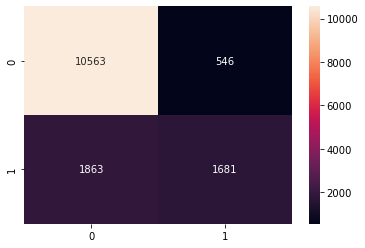

In [32]:
import seaborn as sns
sns.heatmap(confusion,annot=True,fmt='.5g')